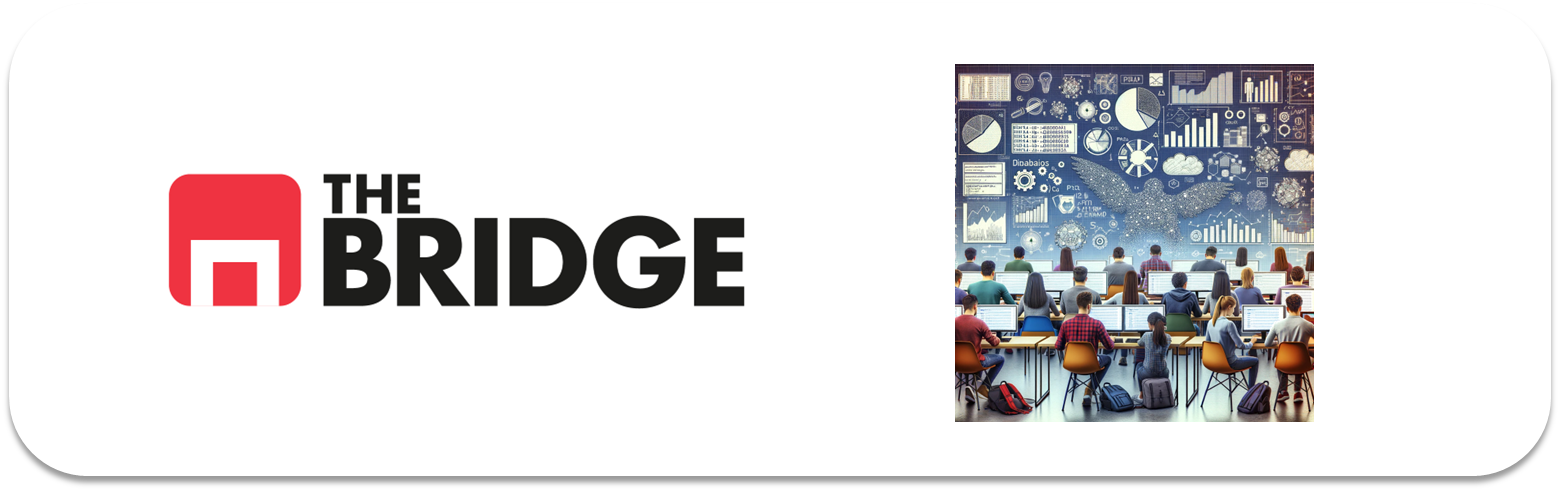

## PRACTICA OBLIGATORIA: **Regresion Lineal y Regularización**

* La práctica obligatoria de esta unidad consiste en hacer un modelado completo de un problema que ya conoces, la predicción de casas, pero con otro dataset. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Modelo de Regresión Lineal

El objetivo del modelo que tienes que construir es predecir la mediana del precio de las casas en una zona del área metropolitana de Boston dadas las características de las mismas. Sí, es parecido pero no igual a lo que hemos venido haciendo.

Aquí tienes una descripción de las variables del dataset, del que tendrás que decidir el target:  

***CRIM:*** Tasa de criminalidad per cápita por ciudad  
***ZN:*** Proporción de terreno residencial destinado a lotes de más de 25,000 pies cuadrados  
***INDUS:*** Proporción de acres de negocios no minoristas por ciudad  
***CHAS:*** Variable ficticia del río Charles (= 1 si el sector limita con el río; 0 en caso contrario)  
***NOX:*** Concentración de óxidos de nitrógeno (partes por 10 millones)  
***RM:*** Número promedio de habitaciones por vivienda  
***AGE:*** Proporción de unidades ocupadas por el propietario construidas antes de 1940  
***DIS:*** Distancias ponderadas a cinco centros de empleo de Boston  
***RAD:*** Índice de accesibilidad a autopistas radiales  
***TAX:*** Tasa de impuesto sobre la propiedad de valor total por $10,000  
***PTRATIO:*** Relación alumno-maestro por ciudad  
***LSTAT:*** % de población de estatus socioeconómico bajo  
***MEDV:*** Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares  

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión lineal, evaluarlo contra un dataset de test reservado del original mostrando MAE,RMSE,MSE y $R2$, comparar las predicciones con los valores reales y realizar al menos un tipo de regularización de las conocidas, testando por lo menos 3 valores diferentes de hiperparámetros.

Los pasos para guiar el trabajo:
1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas.
2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.
3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.
4. Construye las parejas X,y de train y test
5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
6. Trata las variables para que funcionen lo mejor posible en el modelo.
7. Construye un modelo de regresión lineal.
8. Analiza si lo crees conveniente los pesos y la importancia de las features.
8. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.
9. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.
10. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?



### Resolución de la práctica

In [40]:
# 0: Cargamos librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
# 1: Cargamos el dataset
boston_housing = pd.read_csv("./data/hard_to_find/obligatoria_hard.csv", sep="|")
display(boston_housing)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


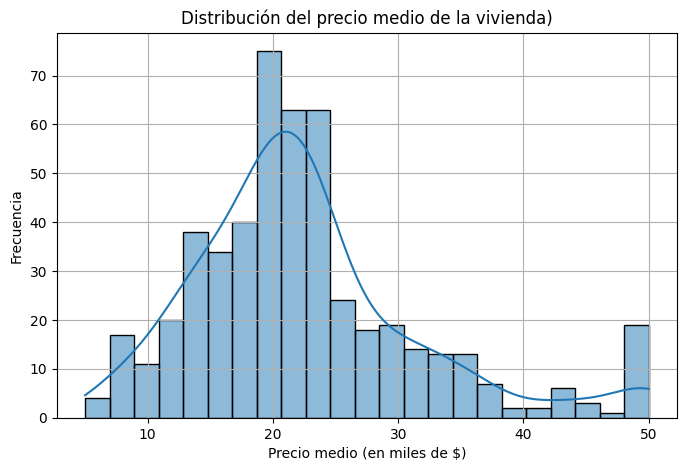

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64


In [42]:
# 2: Análisis de la variable target (MEDV)
plt.figure(figsize=(8, 5))
sns.histplot(boston_housing["MEDV"], kde=True)
plt.title("Distribución del precio medio de la vivienda)")
plt.xlabel("Precio medio (en miles de $)")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

# Algunos de sus estadísticos
print(boston_housing["MEDV"].describe())

MEDV es una elección adecuada para regresión lineal pues:
- Es una variable continua
- Tiene variabilidad suficiente, vemos una distribución dispersa, hay valores bajos, intermedios y altos
- Corresponde a un problema real de regresión, como el ejemplo hecho en los workout, existe una relación cuantitativa entre la variable target y las features

### EDA

In [43]:
# Correlación con el target
matriz_correlacion = boston_housing.corr(numeric_only=True)
cor_target = matriz_correlacion["MEDV"].sort_values(ascending=False)

print(cor_target)

MEDV       1.000000
RM         0.695360
ZN         0.360445
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64


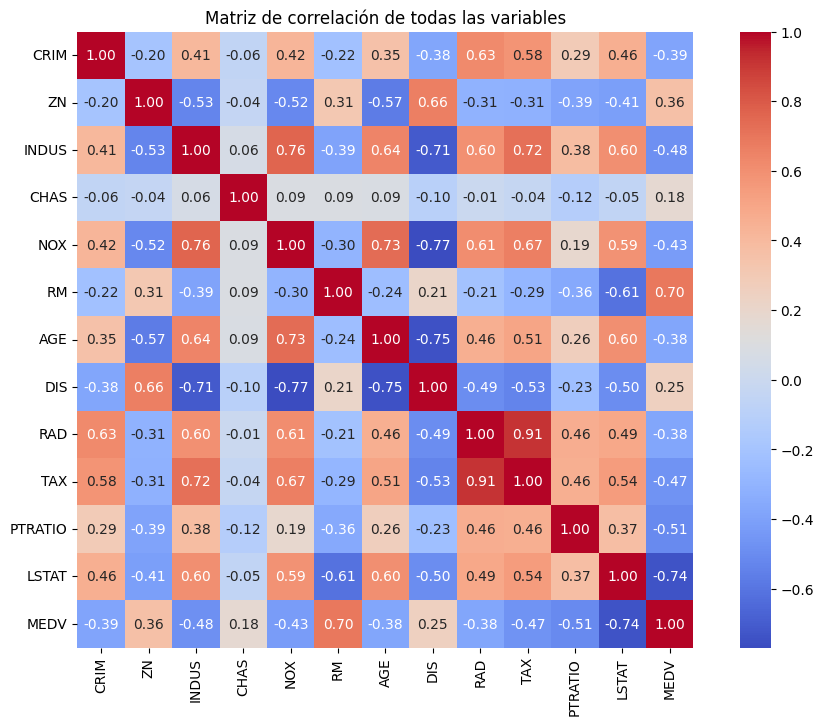

In [44]:
# Mapa de calor, para hacerlo más visual
plt.figure(figsize=(12, 8))
sns.heatmap(matriz_correlacion, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Matriz de correlación de todas las variables")
plt.show()

Teniendo en cuenta tanto las correlaciones como el propio significado de las variables, me quedaré con los siguientes features:
- RM (más habitaciones suele indicar mayor calidad, tamaño, y por tanto precio)
- LSTAT (alta proporción de población de bajos recursos suele significar que estamos en un barrio pobre)
- CRIM (la seguridad creo que es clave a la hora de elegir dónde vivir)
- AGE (la antiguedad de la casa lógicamente también influirá)
- RAD (la comunicación rapida mediante carretera es vital a la hora de elehgir vivienda)
- TAX (la tasa de impuesto influirá en el valor de la vivienda)
- NOX (mucha polución también devaluará el precio de la casa)

El resto de variables o bien no tienen mucha correlación o, a pesar de tenerla, analizando su significado, no me parecen tan relevantes.

In [45]:
# 3 y 4: Selección de features + Split train/test
from sklearn.model_selection import train_test_split

features = ["RM", "LSTAT", "CRIM", "AGE", "RAD", "TAX", "NOX"]

# Construimos X e y
X = boston_housing[features]
y = boston_housing["MEDV"]

# Hacemos el split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Comprobamos dimensiones
print("Tamaño de X_train:", X_train.shape)
print("Tamaño de X_test:", X_test.shape)
print("Tamaño de y_train:", y_train.shape)
print("Tamaño de y_test:", y_test.shape)

Tamaño de X_train: (404, 7)
Tamaño de X_test: (102, 7)
Tamaño de y_train: (404,)
Tamaño de y_test: (102,)


In [46]:
# 6: Estandarización
from sklearn.preprocessing import StandardScaler

# Instanciamos el escalador
scaler = StandardScaler()

# Ajustamos el escalador con los datos de entrenamiento y transformamos
X_train_scaled = scaler.fit_transform(X_train)

# Usamos el mismo escalador para transformar los datos de test
X_test_scaled = scaler.transform(X_test)

In [47]:
# 7: Modelo de regresión lineal
from sklearn.linear_model import LinearRegression

# Instanciamos el modelo
lm = LinearRegression()

# Entrenamos con los datos escalados
lm.fit(X_train_scaled, y_train)

# Predecimos sobre el test set
predictions = lm.predict(X_test_scaled)

In [49]:
# 8: Análisis de coeficientes y features

coeficientes = pd.DataFrame({
    "Feature": X_train.columns,
    "Coeficiente": lm.coef_
}).sort_values(by="Coeficiente", key=abs, ascending=False)
coeficientes.set_index("Feature", inplace=True)
display(coeficientes)

,Coeficiente
Feature,
LSTAT,-4.147998
RM,3.792122
TAX,-1.780763
CRIM,-0.893152
RAD,0.891579
AGE,0.498321
NOX,0.352102


| Feature   | Coef. | Interpretación                                                                                                                                                                                 |
| --------- | ----- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **LSTAT** | -4.15 | El mayor impacto negativo. Barrios con mayor % de población de bajo nivel socioeconómico hacen bajar el precio medio de la vivienda considerablemente.                           |
| **RM**    | +3.79 | Gran impacto positivo. A más habitaciones por casa, mayor precio medio: lógico y esperable.                                                                                             |
| **TAX**   | -1.78 | Impuestos altos tienden a disminuir el valor de la vivienda. Probablemente refleja zonas menos atractivas fiscalmente.                                                          |
| **CRIM**  | -0.89 | La criminalidad afecta negativamente al precio de la vivienda, aunque el impacto es más moderado que con la variable LSTAT por ejemplo.                                            |
| **RAD**   | +0.89 | Buen peso positivo. El acceso a autopistas podría asociarse a mejor movilidad y por tanto una zona más demandada.                                                                      |
| **AGE**   | +0.50 | Ligeramente positivo, también me sorprende un poco, quizá sea porque algunas casas antiguas tienen valor histórico o están bien conservadas.                                       |
| **NOX**   | +0.35 | Esto es sorprendente. La contaminación no debería elevar precios.                |


In [50]:
# 9: Evaluación
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Errores
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

# Mostramos resultados
print(f"MAE:  {mae:.2f}")
print(f"MSE:  {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.4f}")

MAE:  3.70
MSE:  30.81
RMSE: 5.55
R²:   0.5799


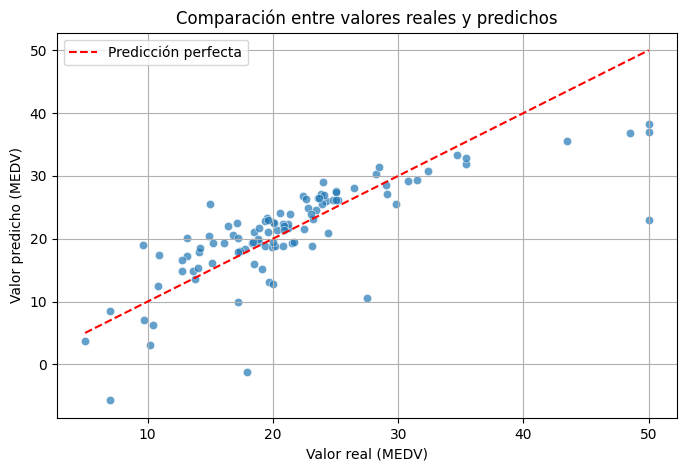

In [51]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=predictions, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Predicción perfecta")
plt.xlabel("Valor real (MEDV)")
plt.ylabel("Valor predicho (MEDV)")
plt.title("Comparación entre valores reales y predichos")
plt.legend()
plt.grid(True)
plt.show()

In [52]:
# 10: Regularización
from sklearn.linear_model import Ridge, Lasso

alphas = [0.01, 0.1, 1, 10]

mse_lm = mean_squared_error(y_test, predictions)
r2_lm = r2_score(y_test, predictions)
print("=== Regresión lineal (sin regularización) ===")
print(f"  MSE: {mse_lm:.2f}")
print(f"  R² : {r2_lm:.4f}")
print()

print("=== Regresión Ridge ===")
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    y_pred_ridge = ridge.predict(X_test_scaled)

    mse = mean_squared_error(y_test, y_pred_ridge)
    r2 = r2_score(y_test, y_pred_ridge)

    print(f"Alpha: {alpha}")
    print(f"  MSE: {mse:.2f}")
    print(f"  R² : {r2:.4f}")
    print()

print("=== Regresión LASSO ===")
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_scaled, y_train)
    y_pred_lasso = lasso.predict(X_test_scaled)

    mse = mean_squared_error(y_test, y_pred_lasso)
    r2 = r2_score(y_test, y_pred_lasso)
    num_zero_coefs = np.sum(lasso.coef_ == 0)

    print(f"Alpha: {alpha}")
    print(f"  MSE: {mse:.2f}")
    print(f"  R² : {r2:.4f}")
    print(f"  Coeficientes eliminados: {num_zero_coefs}")
    print()

=== Regresión lineal (sin regularización) ===
  MSE: 30.81
  R² : 0.5799

=== Regresión Ridge ===
Alpha: 0.01
  MSE: 30.81
  R² : 0.5799

Alpha: 0.1
  MSE: 30.81
  R² : 0.5799

Alpha: 1
  MSE: 30.82
  R² : 0.5798

Alpha: 10
  MSE: 30.87
  R² : 0.5791

=== Regresión LASSO ===
Alpha: 0.01
  MSE: 30.88
  R² : 0.5789
  Coeficientes eliminados: 0

Alpha: 0.1
  MSE: 31.34
  R² : 0.5727
  Coeficientes eliminados: 1

Alpha: 1
  MSE: 30.28
  R² : 0.5871
  Coeficientes eliminados: 3

Alpha: 10
  MSE: 75.05
  R² : -0.0233
  Coeficientes eliminados: 7



### 11: Conclusiones y elección de modelo

Me quedaría con el modelo Lasso con $\alpha = 1$. Los modelos Ridge apenas modifican los resultados porque ya habíamos escalado las variables bien y tampoco hay una alta multicolinealidad. Dentro de los Lasso, el elegido creo que es ideal pues:
- Es el que obtiene un mejor $R^2$ con un MSE aceptable. 
- Además, elimina tres variables, un número coherente y que simplifica el modelo y lo hace más interpretable.
- Controla el overfitting sin perder mucha precisión.